# Pyspark

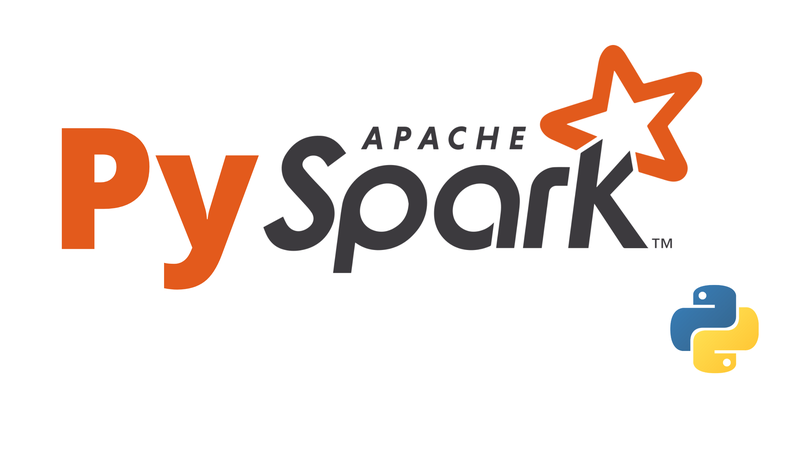

### For the documentation click on the link......
#### https://sparkbyexamples.com/pyspark/pyspark-create-an-empty-dataframe/

# PySpark DataFrame

### PySpark – Create an Empty DataFrame & RDD

### 1. Create Empty RDD in PySpark

In [2]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 7.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 4.9 MB/s eta 0:00:00a 0:00:01
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=85d88e4cf2257cc602f7da1936bbeaf2eb7be478e3bd1f18d3d97af37f371474
  Stored in directory: /home/codespace/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
! python -m pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.4 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: pip
    Found existing installation: pip 23.3
    Uninstalling pip-23.3:
      Successfully uninstalled pip-23.3
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
# import spark module
from pyspark.sql import SparkSession

In [5]:
# crearte sparkSession
spark = SparkSession.builder.appName("Spark Example").getOrCreate()

23/11/01 07:42:31 WARN Utils: Your hostname, codespaces-e44da0 resolves to a loopback address: 127.0.0.1; using 172.16.5.4 instead (on interface eth0)
23/11/01 07:42:31 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/01 07:42:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [6]:
spark

In [7]:
# create empty RDD
empty_rdd = spark.sparkContext.emptyRDD()
print(empty_rdd)

EmptyRDD[1] at emptyRDD at NativeMethodAccessorImpl.java:0


In [9]:
empty_rdd

EmptyRDD[1] at emptyRDD at NativeMethodAccessorImpl.java:0

In [12]:
# create empty RDD using parallelize
rdd2 = spark.sparkContext.parallelize([])
print(rdd2)

ParallelCollectionRDD[2] at readRDDFromFile at PythonRDD.scala:287


### 2. Create Empty DataFrame with Schema (StructType)
-  Create a schema using StructType and StructField .

In [15]:
# from pyspark.sql.types import StructType, StructField, StringType, IntegerType

from pyspark.sql.types import *

In [16]:
# create schema
schema = StructType([
    StructField(name="firstName", dataType=StringType(), nullable=True),
    StructField(name="middleName", dataType=StringType(), nullable=True),
    StructField(name="lastName", dataType=StringType(), nullable=True)
])

In [23]:
#Create empty DataFrame from empty RDD
df = spark.createDataFrame(data=empty_rdd, schema=schema)
df.printSchema(),
df.show()

root
 |-- firstName: string (nullable = true)
 |-- middleName: string (nullable = true)
 |-- lastName: string (nullable = true)

+---------+----------+--------+
|firstName|middleName|lastName|
+---------+----------+--------+
+---------+----------+--------+



### 3. Convert Empty RDD to DataFrame

In [26]:
df1 = empty_rdd.toDF(schema)
df1.show(),
df1.printSchema()

+---------+----------+--------+
|firstName|middleName|lastName|
+---------+----------+--------+
+---------+----------+--------+

root
 |-- firstName: string (nullable = true)
 |-- middleName: string (nullable = true)
 |-- lastName: string (nullable = true)



### 4. Create Empty DataFrame with Schema.

In [29]:
df2 = spark.createDataFrame(data = [], schema=schema)
df2.printSchema(),
df2.show()

root
 |-- firstName: string (nullable = true)
 |-- middleName: string (nullable = true)
 |-- lastName: string (nullable = true)

+---------+----------+--------+
|firstName|middleName|lastName|
+---------+----------+--------+
+---------+----------+--------+



### 5. Create Empty DataFrame without Schema (no columns)

In [33]:
df3 = spark.createDataFrame(data = [], schema=StructType([]))
df3.printSchema(),
df3.show()

root

++
||
++
++



## Convert PySpark RDD to DataFrame
#### below is the link for the documentation.....
##### https://sparkbyexamples.com/pyspark/convert-pyspark-rdd-to-dataframe/


- Create PySpark RDD
- Convert PySpark RDD to DataFrame
    - using toDF()
    - using createDataFrame()
    - using RDD row type & schema

### 1. Create PySpark RDD

In [34]:
dept = [("Finance",10),("Marketing",20),("Sales",30),("IT",40)]

In [37]:
rdd = spark.sparkContext.parallelize(dept)
print(rdd)

ParallelCollectionRDD[91] at readRDDFromFile at PythonRDD.scala:287


### 2. Convert PySpark RDD to DataFrame

### - 2.1 Using rdd.toDF() function

In [47]:
df = rdd.toDF()
df.printSchema(),
df.show()

root
 |-- _1: string (nullable = true)
 |-- _2: long (nullable = true)

+---------+---+
|       _1| _2|
+---------+---+
|  Finance| 10|
|Marketing| 20|
|    Sales| 30|
|       IT| 40|
+---------+---+



In [49]:
dept_column = ["dept_name", "dept_id"]
df2 = rdd.toDF(dept_column)
df2.printSchema()
df2.show()

root
 |-- dept_name: string (nullable = true)
 |-- dept_id: long (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|  Finance|     10|
|Marketing|     20|
|    Sales|     30|
|       IT|     40|
+---------+-------+



### - 2.2 Using PySpark createDataFrame() function

In [51]:
df3 = spark.createDataFrame(data = dept, schema=dept_column)
df3.printSchema(),
df3.show()

root
 |-- dept_name: string (nullable = true)
 |-- dept_id: long (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|  Finance|     10|
|Marketing|     20|
|    Sales|     30|
|       IT|     40|
+---------+-------+



### - 2.3 Using createDataFrame() with StructType schema

In [58]:
schema = StructType([
    StructField(name="dept_name", dataType=StringType(), nullable=True),
    StructField(name="dept_id", dataType=IntegerType(), nullable=True)
])

df4 = spark.createDataFrame(data=dept, schema=schema)
df4.printSchema(),
# truncate use to allign your text
df4.show(truncate=False)

root
 |-- dept_name: string (nullable = true)
 |-- dept_id: integer (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



In [59]:
df4.show(truncate=True)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|  Finance|     10|
|Marketing|     20|
|    Sales|     30|
|       IT|     40|
+---------+-------+



In [57]:
# truncate use to allign your text
df4.show(truncate=False)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



### Full example
<br>
<p>import pyspark <br>
from pyspark.sql import SparkSession <br>
<br><br>
    
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate() <br>

dept = [("Finance",10),("Marketing",20),("Sales",30),("IT",40)] <br>
rdd = spark.sparkContext.parallelize(dept) <br>

df = rdd.toDF() <br>
df.printSchema() <br>
df.show(truncate=False) <br>

deptColumns = ["dept_name","dept_id"] <br>
df2 = rdd.toDF(deptColumns)<br>
df2.printSchema()<br>
df2.show(truncate=False)<br>

deptDF = spark.createDataFrame(rdd, schema = deptColumns)<br>
deptDF.printSchema()<br>
deptDF.show(truncate=False)<br>
<br>
from pyspark.sql.types import StructType,StructField, StringType<br>
deptSchema = StructType([       <br>
    StructField('dept_name', StringType(), True),<br>
    StructField('dept_id', StringType(), True)<br>
])<br>

deptDF1 = spark.createDataFrame(rdd, schema = deptSchema)<br>
deptDF1.printSchema()<br>
deptDF1.show(truncate=False)</p>

## Convert PySpark DataFrame to Pandas
#### below is the resources link....
##### https://sparkbyexamples.com/pyspark/convert-pyspark-rdd-to-dataframe/

In [8]:
data = [("James","","Smith","36636","M",60000),
        ("Michael","Rose","","40288","M",70000),
        ("Robert","","Williams","42114","",400000),
        ("Maria","Anne","Jones","39192","F",500000),
        ("Jen","Mary","Brown","","F",0)]

columns = ["first_name","middle_name","last_name","dob","gender","salary"]
pyspark_df = spark.createDataFrame(data=data, schema=columns)
pyspark_df.printSchema(),
pyspark_df.show(truncate=False)

root
 |-- first_name: string (nullable = true)
 |-- middle_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+----------+-----------+---------+-----+------+------+
|first_name|middle_name|last_name|dob  |gender|salary|
+----------+-----------+---------+-----+------+------+
|James     |           |Smith    |36636|M     |60000 |
|Michael   |Rose       |         |40288|M     |70000 |
|Robert    |           |Williams |42114|      |400000|
|Maria     |Anne       |Jones    |39192|F     |500000|
|Jen       |Mary       |Brown    |     |F     |0     |
+----------+-----------+---------+-----+------+------+



#### Convert PySpark Dataframe to Pandas DataFrame

In [12]:
sparkdf_pandas_df = pyspark_df.toPandas()
print(sparkdf_pandas_df)

  first_name middle_name last_name    dob gender  salary
0      James                 Smith  36636      M   60000
1    Michael        Rose            40288      M   70000
2     Robert              Williams  42114         400000
3      Maria        Anne     Jones  39192      F  500000
4        Jen        Mary     Brown             F       0


#### Convert Spark Nested Struct DataFrame to Pandas

In [13]:
dataStruct = [(("James","","Smith"),"36636","M","3000"), \
      (("Michael","Rose",""),"40288","M","4000"), \
      (("Robert","","Williams"),"42114","M","4000"), \
      (("Maria","Anne","Jones"),"39192","F","4000"), \
      (("Jen","Mary","Brown"),"","F","-1") \
]

In [17]:
dataStruct

[(('James', '', 'Smith'), '36636', 'M', '3000'),
 (('Michael', 'Rose', ''), '40288', 'M', '4000'),
 (('Robert', '', 'Williams'), '42114', 'M', '4000'),
 (('Maria', 'Anne', 'Jones'), '39192', 'F', '4000'),
 (('Jen', 'Mary', 'Brown'), '', 'F', '-1')]

In [18]:
from pyspark.sql.types import *

In [76]:
schemaStruct = StructType([
    StructField('name', StructType([
        StructField('firstname', StringType(), True),
        StructField('middlename', StringType(), True),
        StructField('lastname', StringType(), True)
    ])),
    StructField('dob', StringType(), True),
    StructField('gender', StringType(), True),
    StructField('salary', StringType(), True)
     ])

df = spark.createDataFrame(data=dataStruct, schema=schemaStruct)
df.printSchema(),
df.show()

root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: string (nullable = true)

+--------------------+-----+------+------+
|                name|  dob|gender|salary|
+--------------------+-----+------+------+
|    {James, , Smith}|36636|     M|  3000|
|   {Michael, Rose, }|40288|     M|  4000|
|{Robert, , Williams}|42114|     M|  4000|
|{Maria, Anne, Jones}|39192|     F|  4000|
|  {Jen, Mary, Brown}|     |     F|    -1|
+--------------------+-----+------+------+



## Note:
- If we will not define the nested schema it will not show the internal list data

In [73]:
# If we will not define the nested schema it will not show the internal list data
schemaStruct = StructType([
    StructField('name', StringType(), nullable=True),
    StructField('dob', StringType(), True),
    StructField('gender', StringType(), True),
    StructField('salary', StringType(), True)
     ])

df = spark.createDataFrame(data=dataStruct, schema=schemaStruct)
df.printSchema(),
df.show()

root
 |-- name: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: string (nullable = true)

+--------------------+-----+------+------+
|                name|  dob|gender|salary|
+--------------------+-----+------+------+
|[Ljava.lang.Objec...|36636|     M|  3000|
|[Ljava.lang.Objec...|40288|     M|  4000|
|[Ljava.lang.Objec...|42114|     M|  4000|
|[Ljava.lang.Objec...|39192|     F|  4000|
|[Ljava.lang.Objec...|     |     F|    -1|
+--------------------+-----+------+------+



## PySpark show() – Display DataFrame Contents in Table

### 1. Quick Example of show()


 Default - displays 20 rows and<br><br> 
 20 charactes from column value 
- df.show()

Display full column contents
- df.show(truncate=False)

Display 2 rows and full column contents
- df.show(2,truncate=False) 

Display 2 rows & column values 25 characters
- df.show(2,truncate=25) 

Display DataFrame rows & columns vertically
- df.show(n=3,truncate=25,vertical=True)

### Resources Link
#### https://sparkbyexamples.com/pyspark/pyspark-show-display-dataframe-contents-in-table/

In [77]:
data = [("James","","Smith","36636","M",60000),
        ("Michael","Rose","","40288","M",70000),
        ("Robert","","Williams","42114","",400000),
        ("Maria","Anne","Jones","39192","F",500000),
        ("Jen","Mary","Brown","","F",0)]

columns = ["first_name","middle_name","last_name","dob","gender","salary"]

In [80]:
df = spark.createDataFrame(data=data, schema=columns)
df.show(),
df.show(truncate=False),
df.show(2)

+----------+-----------+---------+-----+------+------+
|first_name|middle_name|last_name|  dob|gender|salary|
+----------+-----------+---------+-----+------+------+
|     James|           |    Smith|36636|     M| 60000|
|   Michael|       Rose|         |40288|     M| 70000|
|    Robert|           | Williams|42114|      |400000|
|     Maria|       Anne|    Jones|39192|     F|500000|
|       Jen|       Mary|    Brown|     |     F|     0|
+----------+-----------+---------+-----+------+------+

+----------+-----------+---------+-----+------+------+
|first_name|middle_name|last_name|dob  |gender|salary|
+----------+-----------+---------+-----+------+------+
|James     |           |Smith    |36636|M     |60000 |
|Michael   |Rose       |         |40288|M     |70000 |
|Robert    |           |Williams |42114|      |400000|
|Maria     |Anne       |Jones    |39192|F     |500000|
|Jen       |Mary       |Brown    |     |F     |0     |
+----------+-----------+---------+-----+------+------+

+-------

In [82]:
df.show(2, truncate=False)

+----------+-----------+---------+-----+------+------+
|first_name|middle_name|last_name|dob  |gender|salary|
+----------+-----------+---------+-----+------+------+
|James     |           |Smith    |36636|M     |60000 |
|Michael   |Rose       |         |40288|M     |70000 |
+----------+-----------+---------+-----+------+------+
only showing top 2 rows



In [88]:
df.show(2, truncate=10),
df.show(2, truncate=False)

+----------+-----------+---------+-----+------+------+
|first_name|middle_name|last_name|  dob|gender|salary|
+----------+-----------+---------+-----+------+------+
|     James|           |    Smith|36636|     M| 60000|
|   Michael|       Rose|         |40288|     M| 70000|
+----------+-----------+---------+-----+------+------+
only showing top 2 rows

+----------+-----------+---------+-----+------+------+
|first_name|middle_name|last_name|dob  |gender|salary|
+----------+-----------+---------+-----+------+------+
|James     |           |Smith    |36636|M     |60000 |
|Michael   |Rose       |         |40288|M     |70000 |
+----------+-----------+---------+-----+------+------+
only showing top 2 rows



In [86]:
df.show(2, truncate=25, vertical=True)

-RECORD 0--------------
 first_name  | James   
 middle_name |         
 last_name   | Smith   
 dob         | 36636   
 gender      | M       
 salary      | 60000   
-RECORD 1--------------
 first_name  | Michael 
 middle_name | Rose    
 last_name   |         
 dob         | 40288   
 gender      | M       
 salary      | 70000   
only showing top 2 rows



### 2. show() Syntax
- def show(self, n=20, truncate=True, vertical=False):

### 3. PySpark show() To Display Contents

In [97]:
columns = ["Seqno","Quote"]
data = [("1", "Be the change that you wish to see in the world"),
    ("2", "Everyone thinks of changing the world, but no one thinks of changing himself."),
    ("3", "The purpose of our lives is to be happy."),
    ("4", "Be cool.")]

df = spark.createDataFrame(data=data, schema=columns)
df.show(truncate=False),
df.show(), 
df.show(truncate=25)

+-----+-----------------------------------------------------------------------------+
|Seqno|Quote                                                                        |
+-----+-----------------------------------------------------------------------------+
|1    |Be the change that you wish to see in the world                              |
|2    |Everyone thinks of changing the world, but no one thinks of changing himself.|
|3    |The purpose of our lives is to be happy.                                     |
|4    |Be cool.                                                                     |
+-----+-----------------------------------------------------------------------------+

+-----+--------------------+
|Seqno|               Quote|
+-----+--------------------+
|    1|Be the change tha...|
|    2|Everyone thinks o...|
|    3|The purpose of ou...|
|    4|            Be cool.|
+-----+--------------------+

+-----+-------------------------+
|Seqno|                    Quote|
+-----+---

#### 5. Display Contents Vertically

In [98]:
df.show(2, truncate=False, vertical=True)

-RECORD 0------------------------------------------------------------------------------
 Seqno | 1                                                                             
 Quote | Be the change that you wish to see in the world                               
-RECORD 1------------------------------------------------------------------------------
 Seqno | 2                                                                             
 Quote | Everyone thinks of changing the world, but no one thinks of changing himself. 
only showing top 2 rows



## PySpark StructType & StructField

### 1. StructType – Defines the structure of the Dataframe
- PySpark provides from pyspark.sql.types import StructType class to define the structure of the DataFrame.
- StructType is a collection or list of StructField objects.
- StructField – Defines the metadata of the DataFrame column.
- Using PySpark StructType & StructField with DataFrame.

### Resources Link .....
#### https://sparkbyexamples.com/pyspark/pyspark-structtype-and-structfield/

In [100]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructField, StringType, IntegerType

In [4]:
spark = SparkSession.builder.master("local[1]")\
        .appName("SparkPractice")\
        .getOrCreate()

In [5]:
spark

In [106]:
# data
data = [("James","","Smith","36636","M",3000),
    ("Michael","Rose","","40288","M",4000),
    ("Robert","","Williams","42114","M",4000),
    ("Maria","Anne","Jones","39192","F",4000),
    ("Jen","Mary","Brown","","F",-1)
  ]

# create a schema
schema = StructType([
    StructField(name="firstName", dataType=StringType(), nullable=True),\
    StructField(name="middleName", dataType=StringType(), nullable=True),\
    StructField(name="lastName", dataType=StringType(), nullable=True),\
    StructField(name="Id", dataType=StringType(), nullable=True),\
    StructField(name="gender", dataType=StringType(), nullable=True),\
    StructField(name="salary", dataType=IntegerType(), nullable=True)\
])

df = spark.createDataFrame(data=data, schema=schema)
df.show(),
df.printSchema(),
df.show(truncate=False)

+---------+----------+--------+-----+------+------+
|firstName|middleName|lastName|   Id|gender|salary|
+---------+----------+--------+-----+------+------+
|    James|          |   Smith|36636|     M|  3000|
|  Michael|      Rose|        |40288|     M|  4000|
|   Robert|          |Williams|42114|     M|  4000|
|    Maria|      Anne|   Jones|39192|     F|  4000|
|      Jen|      Mary|   Brown|     |     F|    -1|
+---------+----------+--------+-----+------+------+

root
 |-- firstName: string (nullable = true)
 |-- middleName: string (nullable = true)
 |-- lastName: string (nullable = true)
 |-- Id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

+---------+----------+--------+-----+------+------+
|firstName|middleName|lastName|Id   |gender|salary|
+---------+----------+--------+-----+------+------+
|James    |          |Smith   |36636|M     |3000  |
|Michael  |Rose      |        |40288|M     |4000  |
|Robert   |          |Williams|

## PySpark Column Class | Operators & Functions

#### pyspark.sql.Column class provides several functions to work with DataFrame to 
- manipulate the Column values, 
- evaluate the boolean expression to filter rows, 
- retrieve a value or part of a value from a DataFrame column, 
- and to work with list, map & struct columns.

### Resources Link....
#### https://sparkbyexamples.com/pyspark/pyspark-column-functions/

## 1. Create Column Class Object
- One of the simplest ways to create a Column class object is by using <br> PySpark lit() SQL function, this takes a literal value and returns a Column object.

## Column

In [32]:
from pyspark.sql import SparkSession

In [33]:
from pyspark.sql.functions import lit
colObj = lit("sparkbyexamples.com")

In [34]:
colObj

Column<'sparkbyexamples.com'>

In [73]:
data = [("James", 23), ("Anna", 40)]
df = spark.createDataFrame(data).toDF("name.fname", "age")
df.printSchema(),
df.show()

root
 |-- name.fname: string (nullable = true)
 |-- age: long (nullable = true)

+----------+---+
|name.fname|age|
+----------+---+
|     James| 23|
|      Anna| 40|
+----------+---+



In [37]:
df.toDF("name.fname", "gender").show()

+----------+------+
|name.fname|gender|
+----------+------+
|     James|    23|
|      Anna|    40|
+----------+------+



In [74]:
data = [("James", 23), ("Anna", 40)]
df = spark.createDataFrame(data, ("name", "age"))
df.show(),
df.printSchema()

+-----+---+
| name|age|
+-----+---+
|James| 23|
| Anna| 40|
+-----+---+

root
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)



In [38]:
df.show()

+-----+---+
| name|age|
+-----+---+
|James| 23|
| Anna| 40|
+-----+---+



In [43]:
df.select(df['age']).show(),
df.select(df['name']).show()

+---+
|age|
+---+
| 23|
| 40|
+---+

+-----+
| name|
+-----+
|James|
| Anna|
+-----+



In [44]:
df.select(df.age).show(),
df.select(df.name).show()

+---+
|age|
+---+
| 23|
| 40|
+---+

+-----+
| name|
+-----+
|James|
| Anna|
+-----+



In [45]:
from pyspark.sql.functions import col

In [47]:
df.select(col('age')).show()

+---+
|age|
+---+
| 23|
| 40|
+---+



In [48]:
df.select(col("name")).show()

+-----+
| name|
+-----+
|James|
| Anna|
+-----+



## Row
#### Create DataFrame with struct using Row class

In [49]:
from pyspark.sql import Row

In [54]:
help(Row)

Help on class Row in module pyspark.sql.types:

class Row(builtins.tuple)
 |  Row(*args: Optional[str], **kwargs: Optional[Any]) -> 'Row'
 |  
 |  A row in :class:`DataFrame`.
 |  The fields in it can be accessed:
 |  
 |  * like attributes (``row.key``)
 |  * like dictionary values (``row[key]``)
 |  
 |  ``key in row`` will search through row keys.
 |  
 |  Row can be used to create a row object by using named arguments.
 |  It is not allowed to omit a named argument to represent that the value is
 |  None or missing. This should be explicitly set to None in this case.
 |  
 |  .. versionchanged:: 3.0.0
 |      Rows created from named arguments no longer have
 |      field names sorted alphabetically and will be ordered in the position as
 |      entered.
 |  
 |  Examples
 |  --------
 |  >>> from pyspark.sql import Row
 |  >>> row = Row(name="Alice", age=11)
 |  >>> row
 |  Row(name='Alice', age=11)
 |  >>> row['name'], row['age']
 |  ('Alice', 11)
 |  >>> row.name, row.age
 |  ('A

In [57]:
from pyspark.sql import Row
row = Row(name="Alice", age=11)
row

Row(name='Alice', age=11)

In [51]:
data = [Row(name="Kamal", prop = Row(hair="black", eye="black")),
        Row(name="Chanda", prop=Row(hair="brown", eye="brown"))]

In [64]:
df = spark.createDataFrame(data)
df.show(),
df.printSchema()

+------+--------------+
|  name|          prop|
+------+--------------+
| Kamal|{black, black}|
|Chanda|{brown, brown}|
+------+--------------+

root
 |-- name: string (nullable = true)
 |-- prop: struct (nullable = true)
 |    |-- hair: string (nullable = true)
 |    |-- eye: string (nullable = true)



In [71]:
df.select(col('prop')).show(),
df.select(col('prop.hair')).show(),
df.select(col("prop.*")).show()

+--------------+
|          prop|
+--------------+
|{black, black}|
|{brown, brown}|
+--------------+

+-----+
| hair|
+-----+
|black|
|brown|
+-----+

+-----+-----+
| hair|  eye|
+-----+-----+
|black|black|
|brown|brown|
+-----+-----+



## 2. PySpark Column Operators

In [76]:
data = [(100,2,1),(200,3,4),(300,4,4)]
df = spark.createDataFrame(data).toDF("col1", "col2", "col3")
df.show(),
df.printSchema()

+----+----+----+
|col1|col2|col3|
+----+----+----+
| 100|   2|   1|
| 200|   3|   4|
| 300|   4|   4|
+----+----+----+

root
 |-- col1: long (nullable = true)
 |-- col2: long (nullable = true)
 |-- col3: long (nullable = true)



### Operators in PySpark

In [78]:
df.select(df.col1 + df.col2).show(),
df.select(df.col1 - df.col2).show(),
df.select(df.col1 * df.col2).show(),
df.select(df.col1 / df.col2).show(),
df.select(df.col1 % df.col2).show(),

df.select(df.col1 > df.col2).show(),
df.select(df.col1 < df.col2).show(),
df.select(df.col1 == df.col2).show()

+-------------+
|(col1 + col2)|
+-------------+
|          102|
|          203|
|          304|
+-------------+

+-------------+
|(col1 - col2)|
+-------------+
|           98|
|          197|
|          296|
+-------------+

+-------------+
|(col1 * col2)|
+-------------+
|          200|
|          600|
|         1200|
+-------------+

+-----------------+
|    (col1 / col2)|
+-----------------+
|             50.0|
|66.66666666666667|
|             75.0|
+-----------------+

+-------------+
|(col1 % col2)|
+-------------+
|            0|
|            2|
|            0|
+-------------+

+-------------+
|(col1 > col2)|
+-------------+
|         true|
|         true|
|         true|
+-------------+

+-------------+
|(col1 < col2)|
+-------------+
|        false|
|        false|
|        false|
+-------------+

+-------------+
|(col1 = col2)|
+-------------+
|        false|
|        false|
|        false|
+-------------+



### 3. PySpark Column Functions
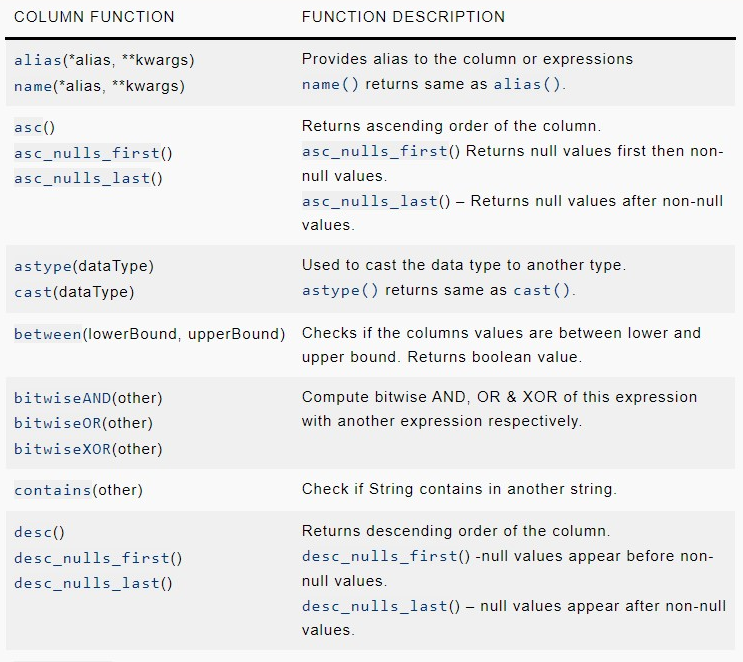
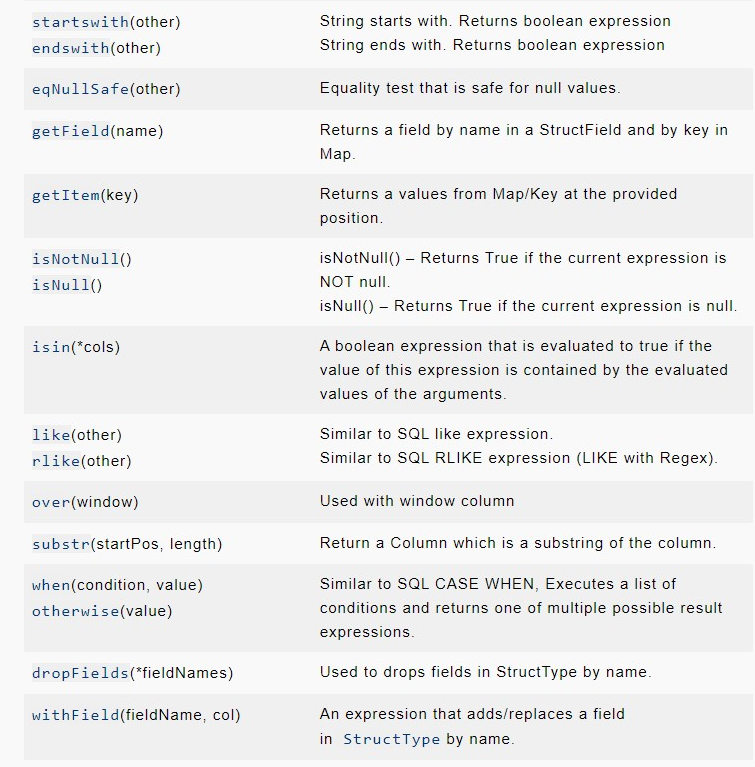

### 4. PySpark Column Functions Examples

In [4]:
data=[("James","Bond","100",None),
      ("Ann","Varsa","200",'F'),
      ("Tom Cruise","XXX","400",''),
      ("Tom Brand",None,"400",'M')] 

columns=["fname","lname","id","gender"]
df=spark.createDataFrame(data,columns)
df.show(),
df.printSchema()

+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|     James| Bond|100|  null|
|       Ann|Varsa|200|     F|
|Tom Cruise|  XXX|400|      |
| Tom Brand| null|400|     M|
+----------+-----+---+------+

root
 |-- fname: string (nullable = true)
 |-- lname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)



## PySpark Select Columns From DataFrame
## Select Function

- <u>Select a Single & Multiple Columns from PySpark
- <u>Select All Columns From List
- <u>Select Columns By Index
- <u>Select a Nested Column
- <u>Other Ways to Select Columns

In [18]:
data = [("James","Smith","USA","CA"),
    ("Michael","Rose","USA","NY"),
    ("Robert","Williams","USA","CA"),
    ("Maria","Jones","USA","FL")
  ]

columns = ["firstname", "lastname", "country", "state"]

df = spark.createDataFrame(data=data, schema=columns)
df.printSchema(),
df.show(truncate=False)

root
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- country: string (nullable = true)
 |-- state: string (nullable = true)

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|James    |Smith   |USA    |CA   |
|Michael  |Rose    |USA    |NY   |
|Robert   |Williams|USA    |CA   |
|Maria    |Jones   |USA    |FL   |
+---------+--------+-------+-----+



### 1. Select Single & Multiple Columns From PySpark

In [28]:
# select single column
df.select(df['firstname']).show(),
df.select(df.firstname).show(),

# import col function
from pyspark.sql.functions import col
df.select(col('firstname')).show()

+---------+
|firstname|
+---------+
|    James|
|  Michael|
|   Robert|
|    Maria|
+---------+

+---------+
|firstname|
+---------+
|    James|
|  Michael|
|   Robert|
|    Maria|
+---------+

+---------+
|firstname|
+---------+
|    James|
|  Michael|
|   Robert|
|    Maria|
+---------+



In [29]:
# select multiple columns
df.select(df['firstname'], df['lastname'], df['state']).show(),
df.select(df.firstname, df.lastname, df.state).show()

# import col function
from pyspark.sql .functions import col
df.select(col('firstname'), col('lastname'), col('state')).show()

+---------+--------+-----+
|firstname|lastname|state|
+---------+--------+-----+
|    James|   Smith|   CA|
|  Michael|    Rose|   NY|
|   Robert|Williams|   CA|
|    Maria|   Jones|   FL|
+---------+--------+-----+

+---------+--------+-----+
|firstname|lastname|state|
+---------+--------+-----+
|    James|   Smith|   CA|
|  Michael|    Rose|   NY|
|   Robert|Williams|   CA|
|    Maria|   Jones|   FL|
+---------+--------+-----+

+---------+--------+-----+
|firstname|lastname|state|
+---------+--------+-----+
|    James|   Smith|   CA|
|  Michael|    Rose|   NY|
|   Robert|Williams|   CA|
|    Maria|   Jones|   FL|
+---------+--------+-----+



### 2. Select All Columns From List

In [33]:
# Select All columns from List
df.select(*columns).show()

# Select All columns
df.select([col for col in df.columns]).show(),

df.select("*").show()

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|    James|   Smith|    USA|   CA|
|  Michael|    Rose|    USA|   NY|
|   Robert|Williams|    USA|   CA|
|    Maria|   Jones|    USA|   FL|
+---------+--------+-------+-----+

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|    James|   Smith|    USA|   CA|
|  Michael|    Rose|    USA|   NY|
|   Robert|Williams|    USA|   CA|
|    Maria|   Jones|    USA|   FL|
+---------+--------+-------+-----+

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|    James|   Smith|    USA|   CA|
|  Michael|    Rose|    USA|   NY|
|   Robert|Williams|    USA|   CA|
|    Maria|   Jones|    USA|   FL|
+---------+--------+-------+-----+



### 3. Select Columns by Index

In [34]:
#Selects first 3 columns and top 3 rows
df.select(df.columns[:3]).show()

+---------+--------+-------+
|firstname|lastname|country|
+---------+--------+-------+
|    James|   Smith|    USA|
|  Michael|    Rose|    USA|
|   Robert|Williams|    USA|
|    Maria|   Jones|    USA|
+---------+--------+-------+



In [35]:
#Selects columns 2 to 4  and top 3 rows
df.select(df.columns[2:4]).show()

+-------+-----+
|country|state|
+-------+-----+
|    USA|   CA|
|    USA|   NY|
|    USA|   CA|
|    USA|   FL|
+-------+-----+



### 4. Select Nested Struct Columns from PySpark


In [39]:
data = [
        (("James",None,"Smith"),"OH","M"),
        (("Anna","Rose",""),"NY","F"),
        (("Julia","","Williams"),"OH","F"),
        (("Maria","Anne","Jones"),"NY","M"),
        (("Jen","Mary","Brown"),"NY","M"),
        (("Mike","Mary","Williams"),"OH","M")
        ]


from pyspark.sql.types import StructType, StructField, StringType

schema = StructType([
    StructField('name', StructType([
         StructField('firstname', StringType(), True),
         StructField('middlename', StringType(), True),
         StructField('lastname', StringType(), True)
         ])),
     StructField('state', StringType(), True),
     StructField('gender', StringType(), True)
     ])

In [41]:
df = spark.createDataFrame(data=data, schema=schema)
df.printSchema(),
df.show(truncate=False)

root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- state: string (nullable = true)
 |-- gender: string (nullable = true)

+----------------------+-----+------+
|name                  |state|gender|
+----------------------+-----+------+
|{James, null, Smith}  |OH   |M     |
|{Anna, Rose, }        |NY   |F     |
|{Julia, , Williams}   |OH   |F     |
|{Maria, Anne, Jones}  |NY   |M     |
|{Jen, Mary, Brown}    |NY   |M     |
|{Mike, Mary, Williams}|OH   |M     |
+----------------------+-----+------+



In [42]:
# select nested columns
df.select('name').show(truncate=False)

+----------------------+
|name                  |
+----------------------+
|{James, null, Smith}  |
|{Anna, Rose, }        |
|{Julia, , Williams}   |
|{Maria, Anne, Jones}  |
|{Jen, Mary, Brown}    |
|{Mike, Mary, Williams}|
+----------------------+



In [43]:
df.select("name.firstname").show(truncate=False)

+---------+
|firstname|
+---------+
|James    |
|Anna     |
|Julia    |
|Maria    |
|Jen      |
|Mike     |
+---------+



In [44]:
# select data from nested columns
df.select("name.firstname", "name.lastname").show(truncate=False)

+---------+--------+
|firstname|lastname|
+---------+--------+
|James    |Smith   |
|Anna     |        |
|Julia    |Williams|
|Maria    |Jones   |
|Jen      |Brown   |
|Mike     |Williams|
+---------+--------+



In [45]:
# select all nest cols
df.select('name.*').show(truncate=False)

+---------+----------+--------+
|firstname|middlename|lastname|
+---------+----------+--------+
|James    |null      |Smith   |
|Anna     |Rose      |        |
|Julia    |          |Williams|
|Maria    |Anne      |Jones   |
|Jen      |Mary      |Brown   |
|Mike     |Mary      |Williams|
+---------+----------+--------+



### 5. Complete Example